<a href="https://colab.research.google.com/github/Munniz1309/macas/blob/main/macas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Notebook 01**
- **Professor:** Iális Cavalcante
- **Monitor:** Iago Magalhães
- **Disciplina:** Ciência de dados
- **Curso:** Engenharia da Computação
- **Descrição:**
O notebook 01 apresenta de forma introdutória o algoritmo de regressão linear aplicado ao dataset 'Apple Quality'. Neste dataset algumas informações são fornecidas como ID, Tamanho, Peso, Doçura, Crocância, Suculência, Maturação, Acidez e Qualidade, através de um arquivo CSV.
Agora imagine a seguinte situação problema, o comerciante Iális deseja comprar maçãs para utilizar no restaurante universitário da UFC que demanda a compra de frutos a partir de certo tamanho. O produtor de maçãs, João Vitor, possui uma máquina que coleta informações das frutas colhidas como Tamanho, Peso, Doçura, Crocância, Suculência, Maturação, Acidez e Qualidade. Com base em seus conhecimentos de ciência de dados ajude o produtor João VItor a estimar o tamanho das maçãs utilizando o algoritmo de **regressão linear**.
Através da imagem a seguir é possível enteder o passo a passo a ser realizado para solucionar o problema.



##Instalação de bibliotecas

In [ ]:
!pip install plotly --upgrade

##Importações de bibliotecas

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

##Leitura de dados

In [ ]:
apples = pd.read_csv('apple_quality.csv')
apples

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


##Funções extras

In [ ]:
def corr(df):
  '''
    Função de correlação
    :param df: recebe dataframe com os dados a serem analisados para gerar a matriz de correlação
    :return: retorna um heatmap dos dados
  '''
  figura = plt.figure(figsize=(10,5))
  return sns.heatmap(df.corr(), annot=True);

##Análise de dados

In [ ]:
#Crie um código para exibir o shape da base de dados disponibilizada
apples.shape

(4001, 9)

In [ ]:
apples.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [ ]:
#Verifique a existência de valores nulos
print(apples.isnull().sum())

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [ ]:
#Removendo valores nulos do dataset
apples = apples.dropna().reset_index(drop=True)
apples

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
apples.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


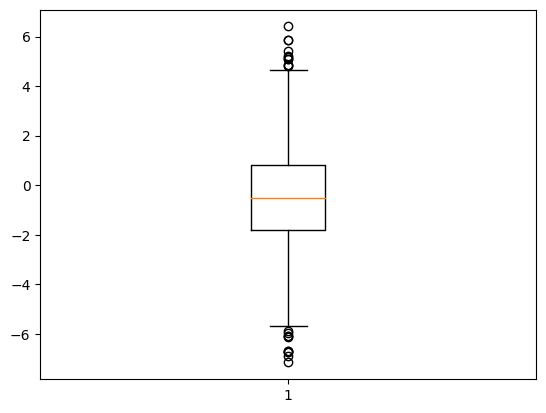

In [ ]:
#Aplicando gráfico de boxplot ao campo 'Size' do dataset
plt.boxplot(apples['Size']);

In [ ]:
#Analisando a correlação dos dados
apples.iloc[:, 0:-2].corr()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
A_id,1.000000,-0.028911,-0.005730,-0.002378,-0.013111,0.006179,0.000742
Size,-0.028911,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773
Weight,-0.005730,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824
Sweetness,-0.002378,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800
Crunchiness,-0.013111,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982
Juiciness,0.006179,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144
Ripeness,0.000742,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000


<Axes: >

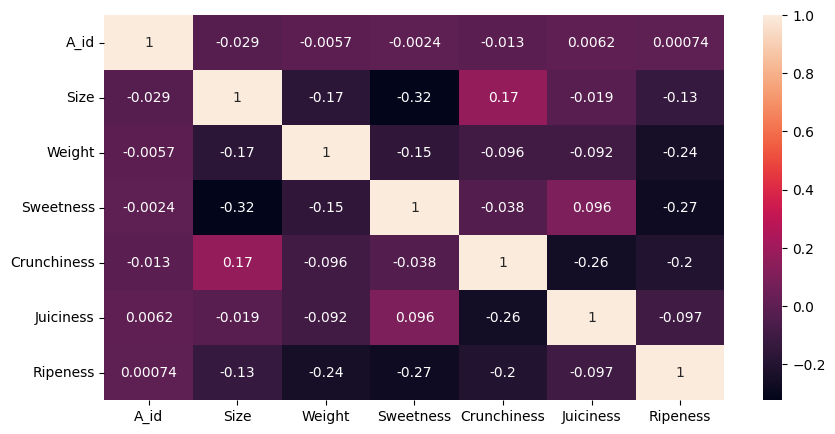

In [ ]:
#Análise da correlação de forma gráfica
corr(apples.iloc[:, 0:-2])

##Algoritmo de Machine Learning

###Divisão de dados de treino e teste

In [ ]:
#Utilizando dados de 'Acidity', 'Weight', 'Sweetness', 'Crunchiness' e 'Juiciness' para prever os dados de 'Size'
X_train, X_test, y_train, y_test = train_test_split(apples[['Acidity', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness']], apples['Size'], test_size = 0.3, random_state = 0)

In [ ]:
print('Shape dos dados de treino: {}'.format(X_train.shape))
print('Shape das classes de treino: {}'.format(y_train.shape, '\n'))
print('Shape dos dados de teste: {}'.format(X_test.shape))
print('Shape das classes de teste: {}'.format(y_test.shape))

Shape dos dados de treino: (2800, 5)
Shape das classes de treino: (2800,)
Shape dos dados de teste: (1200, 5)
Shape das classes de teste: (1200,)


###Algoritmo de Regressão Linear

In [ ]:
#Crie um algortimo de Regressão Linear
regressor_linear = LinearRegression()

###Treinamento do modelo

In [ ]:
#Treine o modelo com a função fit
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor_linear.score(X_test, y_test)

0.25205338756932727

In [ ]:
#Realize previsões com a função predict
previsoes = regressor_linear.predict(X_test)
previsoes

array([-0.02660213, -0.34909741, -1.54010452, ...,  1.21348104,
        0.3715862 ,  0.12328465])

##Visualização dos resultados

In [ ]:
#Calculando ponto de interceptação
regressor_linear.intercept_

-1.0753048140435848

In [ ]:
#Calculando valores de coenficiente
regressor_linear.coef_

array([ 0.2013641 , -0.25789745, -0.35921742,  0.16371545, -0.03478521])

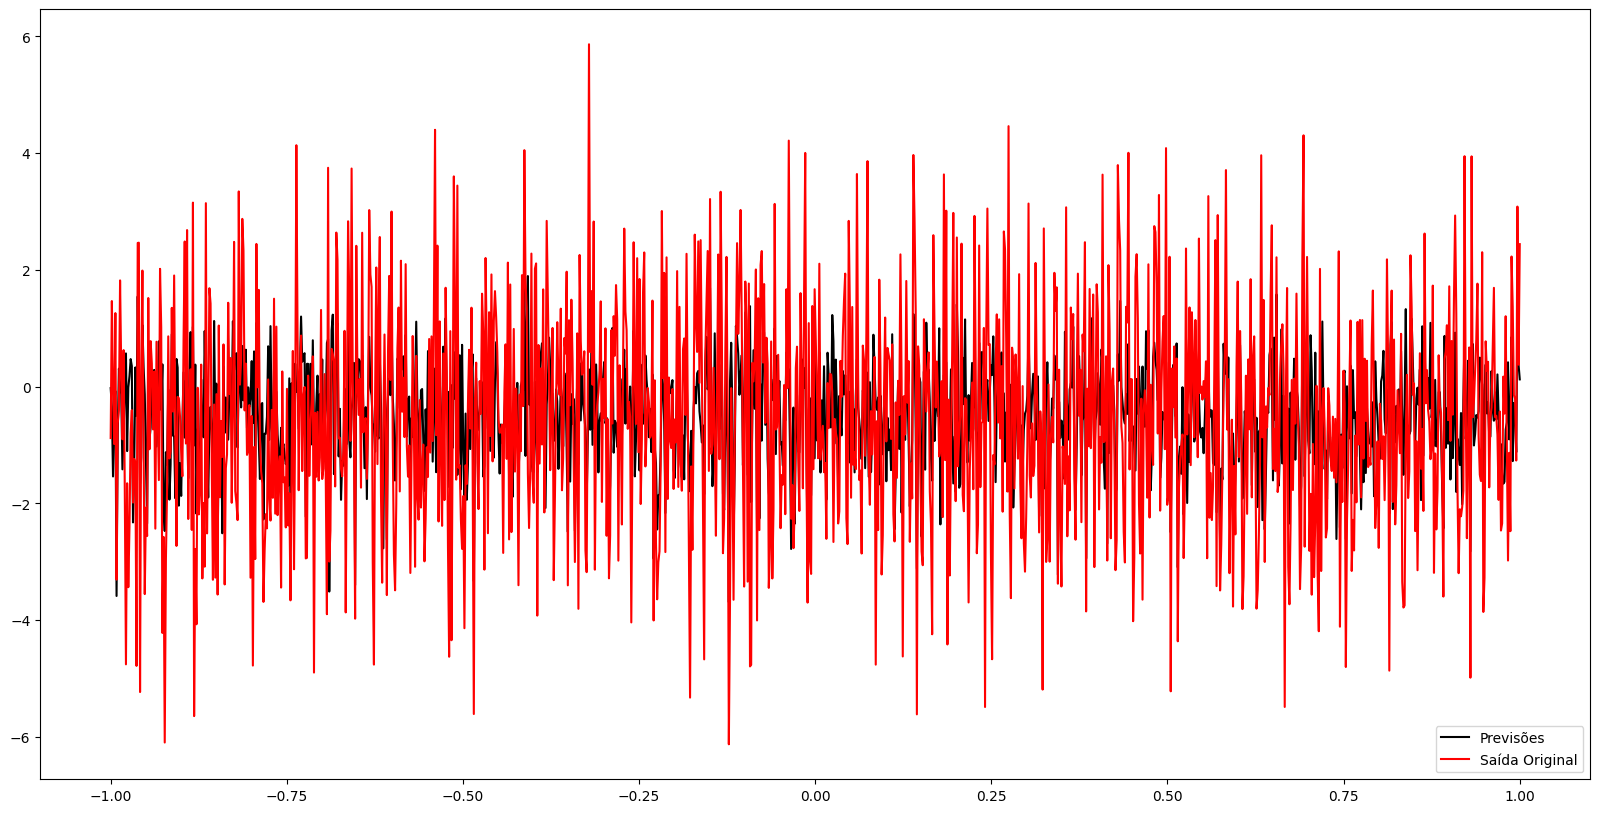

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(np.linspace(-1, 1, len(y_test)), previsoes, label='Previsões', color='black', linewidth=1.5)
plt.plot(np.linspace(-1, 1, len(y_test)), y_test, label='Saída Original', color='red', linewidth=1.5)
plt.legend(loc="lower right")
plt.show()

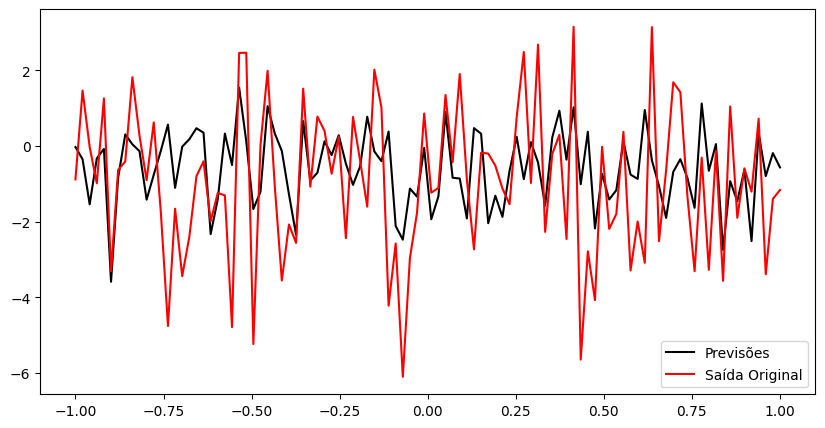

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(-1, 1, 100), previsoes[0:100], label='Previsões', color='black', linewidth=1.5)
plt.plot(np.linspace(-1, 1, 100), y_test[0:100], label='Saída Original', color='red', linewidth=1.5)
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Calculando métricas de avaliação para modelos de regressão
print(" Erro máx. {}.\n Erro médio absoluto: {}.\n Erro quadrático absoluto: {}.\n Raiz do erro quadrático médio: {}. "
      .format(max_error(previsoes, y_test),mean_absolute_error(previsoes, y_test),
      mean_squared_error(previsoes, y_test),mean_squared_error(previsoes, y_test)
      ))

 Erro máx. 6.172910638016853.
 Erro médio absoluto: 1.32541180155926.
 Erro quadrático absoluto: 2.7549568047670165.
 Raiz do erro quadrático médio: 2.7549568047670165. 


##Atividades de casa
- Configure o conjunto de dados de entrada para obter melhores desempenhos do algoritmo de regressão linear para estimar o tamanho da maça;
- Desenvolva um algoritmo utilizando regressão linear para estimar a qualidade da maça;
- Utilizando a correlação das variaveis, construa um algoritmo de regressão linear para estimar o peso da maçã.

In [ ]:
X = apples.drop(['Quality', 'Weight'], axis=1)
y = apples['Weight']

In [ ]:
#Utilizando dados de 'Acidity', 'Weight', 'Sweetness', 'Crunchiness' e 'Juiciness' para prever os dados de 'Size'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
# Algoritmos de classificção
rf_model = LinearRegression()

# Treinamento dos Modelos
rf_model.fit(X_train, y_train)

# Avaliação
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Resultado
rf_predictions

array([-0.9135048 , -0.34116667, -1.76812228, ...,  0.1496013 ,
       -0.76144392, -1.15894099])

In [ ]:
#Calculando métricas de avaliação para modelos de regressão
print(" Erro máx. {}.\n Erro médio absoluto: {}.\n Erro quadrático absoluto: {}.\n Raiz do erro quadrático médio: {}. "
      .format(max_error(rf_predictions, y_test),mean_absolute_error(previsoes, y_test),
      mean_squared_error(rf_predictions, y_test),mean_squared_error(previsoes, y_test)
      ))

 Erro máx. 5.1039326158902485.
 Erro médio absoluto: 1.5093041531074178.
 Erro quadrático absoluto: 1.869258306685379.
 Raiz do erro quadrático médio: 3.659465071611421. 


In [ ]:
apples['Quality'].unique()

array(['good', 'bad'], dtype=object)

##Referências
- [Basics charts with Plotly](https://plotly.com/python/basic-charts/)
- [Seaborn](https://seaborn.pydata.org/)
- [Entendendo correlação](https://www.significados.com.br/correlacao/)
- [Regressão Linear](https://scikit-learn.org/stable/modules/linear_model.html)
- [Métricas de avaliação](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)